# 3.1 : Importation des packages & fonctions

In [1]:
# Importation des packages souhaités
%run P5_Packages.ipynb

In [2]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import Binarizer

In [3]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
# Importation du notebook contenant les fonctions

%run P5_Functions.ipynb

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\evari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
%matplotlib inline

# 3.2 : Importation des fichiers

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
importation = 'df_questions_cleaned.csv'
df_cleaned = pd.read_csv(importation, sep=',')

In [8]:
df_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,id,doc,title,tags,creation_date,score,views,answers,comments,favorites,last_activity_date,text
0,0,0,9056957,python people initialize class attribute two w...,way class variable python,<python><class><attributes>,2012-01-29 21:26:39,296,372888,2,1,105,2021-01-25 13:17:29,way class variable python python people initia...
1,1,1,52013133,use webpack create config file try use htmlweb...,entrypoint index html use htmlwebpackplugin,<node.js><reactjs><webpack><html-webpack-plugin>,2018-08-25 00:32:17,31,33607,5,2,7,2021-07-18 06:19:28,entrypoint index html use htmlwebpackplugin us...
2,2,2,261963,notice math operator num way literate value num,literate num,<c++><enums>,2008-11-04 13:55:29,354,374899,24,5,67,2021-05-23 11:33:10,literate num notice math operator num way lite...
3,3,3,60684868,currently try use pretrained model provide dec...,decker image use compile work cpu,<docker><tensorflow>,2020-03-14 16:25:39,1,225,1,5,1,2021-01-04 03:48:09,decker image use compile work cpu currently tr...
4,4,4,35136616,can not figure case loss application write ele...,handle loss three j,<javascript><three.js><webgl><electron>,2016-02-01 17:26:01,6,412,1,0,1,2021-03-18 17:02:54,handle loss three j can not figure case loss a...


In [9]:
df_txt_cleaned = df_cleaned['text']
df_txt_cleaned.head()

0    way class variable python python people initia...
1    entrypoint index html use htmlwebpackplugin us...
2    literate num notice math operator num way lite...
3    decker image use compile work cpu currently tr...
4    handle loss three j can not figure case loss a...
Name: text, dtype: object

# 3.3 : Creation du dictionnaire sur le corpus

In [10]:
list_txt_cleaned = df_txt_cleaned.copy()

In [11]:
list_txt_cleaned

0        way class variable python python people initia...
1        entrypoint index html use htmlwebpackplugin us...
2        literate num notice math operator num way lite...
3        decker image use compile work cpu currently tr...
4        handle loss three j can not figure case loss a...
                               ...                        
99981    azure devops pipeline run make error action gi...
99982    kotlin could find dk tool java installation ru...
99983    execute java cucumber step get step class atte...
99984    find character string letter try figure look s...
99985    use spi speech recognition b script find one l...
Name: text, Length: 99986, dtype: object

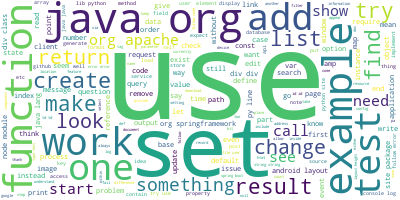

In [12]:
# Plot WordCloud
long_string = ','.join(list(df_txt_cleaned.values))# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, 
                      contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [13]:
# Be sure to split sentence before feed into Dictionary
list_txt_cleaned = [d.split() for d in list_txt_cleaned] # Should turn into a list

In [14]:
# Build dictionary
dictionary = Dictionary(list_txt_cleaned)

In [15]:
# Number of vocabulary words
temp1 = len(dictionary)
print("Number of words inside vocab : ", len(dictionary))

Number of words inside vocab :  218224


In [16]:
# Number of vocabulary words after filtering
ntimes_w_down = 10
ntimes_w_up = 0.90

# Way to detect words that do not appear enough times
# Other solution directly inside countvectorizer function          

dictionary.filter_extremes(no_below = ntimes_w_down,
                          no_above = ntimes_w_up)
print("Number of words inside vocab after reduction: ", len(dictionary))
temp2 = len(dictionary)

Number of words inside vocab after reduction:  15291


In [17]:
prop_words_left = temp2/temp1 * 100
print("Proportion of words left : ", prop_words_left, ' % of initial volume')

Proportion of words left :  7.007020309406848  % of initial volume


In [18]:
# Let's print most present words inside vocab
# Detect useless ones to delete

n_top = 100

words_sorted = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
id2token = {value: key for key, value in dictionary.token2id.items()}

print("Mots les plus fréquents du dictionnaire:")

for e, (i, count) in enumerate(words_sorted[:n_top]):
    print(f"{e+1:2} {id2token[i]:15} {count:5}")

Mots les plus fréquents du dictionnaire:
 1 use             56121
 2 get             38987
 3 try             34047
 4 like            30913
 5 work            30123
 6 code            29460
 7 would           23321
 8 want            23233
 9 error           23211
10 file            22796
11 way             22747
12 find            21358
13 return          19630
14 follow          19314
15 name            19207
16 run             19047
17 create          18802
18 one             18788
19 need            18054
20 class           17347
21 data            17097
22 function        16953
23 value           16821
24 make            16223
25 set             16113
26 example         16037
27 add             15504
28 string          15204
29 problem         15034
30 type            14709
31 know            14653
32 http            13778
33 also            13742
34 time            13324
35 com             13169
36 see             13165
37 can             12996
38 not             12991
39 could 

In [19]:
# Choice to delete some words present many times that do not bring interesting info to our analysis
# Like :  thanks or please etc

remove_words = ['like', 'work', 'would', 'want', 'one', 'need', 'know', 'also',
                'com', 'see', 'can', 'not', 'could', 'look', 'seem',
                'question', 'give', 'two']

# 'something','unlike', 'however', 'thanks','another', 'please',

bad_ids = [dictionary.token2id[token] for token in remove_words]

dictionary.filter_tokens(bad_ids=bad_ids)

In [20]:
pat = r'\b(?:{})\b'.format('|'.join(remove_words))

In [21]:
df_txt_cleaned = df_cleaned.copy()
df_txt_cleaned.shape

(99986, 14)

In [22]:
# We shall delete chosen useless words
df_txt_cleaned['Cleaned_txt'] = df_txt_cleaned['text'].str.replace(pat, '', regex='True')

In [23]:
# Turn it into a list again
list_txt_cleaned = df_txt_cleaned['Cleaned_txt'].copy()

# Be sure to split sentences before feeding into Dictionary
list_txt_cleaned = [d.split() for d in list_txt_cleaned] # Should turn into a list

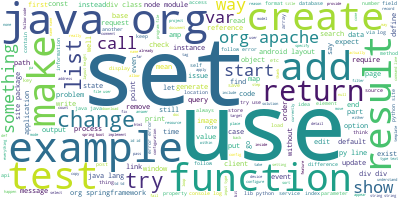

In [24]:
long_string = ','.join(list(df_txt_cleaned['Cleaned_txt'].values)) # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, 
                      contour_width=3, contour_color='steelblue') # Generate a word cloud
wordcloud.generate(long_string) # Visualize the word cloud
wordcloud.to_image()

In [25]:
# # Let's print most present words inside vocab
# # Detect useless ones to delete

# n_top = 100

# words_sorted = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
# id2token = {value: key for key, value in dictionary.token2id.items()}

# print("Mots les plus fréquents du dictionnaire:")

# for e, (i, count) in enumerate(words_sorted[:n_top]):
#     print(f"{e+1:2} {id2token[i]:15} {count:5}")

# Exploration

In [26]:
# Get the word count
df_txt_cleaned['word_count'] = df_txt_cleaned['Cleaned_txt'].str.split().str.len()

df_txt_cleaned['word_count'].mean()

88.0450663092833

In [27]:
df_txt_cleaned.head()

,Unnamed: 0,Unnamed: 0.1,id,doc,title,tags,creation_date,score,views,answers,comments,favorites,last_activity_date,text,Cleaned_txt,word_count
0,0,0,9056957,python people initialize class attribute two w...,way class variable python,<python><class><attributes>,2012-01-29 21:26:39,296,372888,2,1,105,2021-01-25 13:17:29,way class variable python python people initia...,way class variable python python people initia...,35
1,1,1,52013133,use webpack create config file try use htmlweb...,entrypoint index html use htmlwebpackplugin,<node.js><reactjs><webpack><html-webpack-plugin>,2018-08-25 00:32:17,31,33607,5,2,7,2021-07-18 06:19:28,entrypoint index html use htmlwebpackplugin us...,entrypoint index html use htmlwebpackplugin us...,96
2,2,2,261963,notice math operator num way literate value num,literate num,<c++><enums>,2008-11-04 13:55:29,354,374899,24,5,67,2021-05-23 11:33:10,literate num notice math operator num way lite...,literate num notice math operator num way lite...,10
3,3,3,60684868,currently try use pretrained model provide dec...,decker image use compile work cpu,<docker><tensorflow>,2020-03-14 16:25:39,1,225,1,5,1,2021-01-04 03:48:09,decker image use compile work cpu currently tr...,decker image use compile cpu currently try us...,63
4,4,4,35136616,can not figure case loss application write ele...,handle loss three j,<javascript><three.js><webgl><electron>,2016-02-01 17:26:01,6,412,1,0,1,2021-03-18 17:02:54,handle loss three j can not figure case loss a...,handle loss three j figure case loss applica...,79


In [28]:
# Descriptive statistics for word count
df_txt_cleaned['word_count'].describe()

count    99986.000000
mean        88.045066
std        127.068061
min          1.000000
25%         31.000000
50%         54.000000
75%         98.000000
max       3223.000000
Name: word_count, dtype: float64

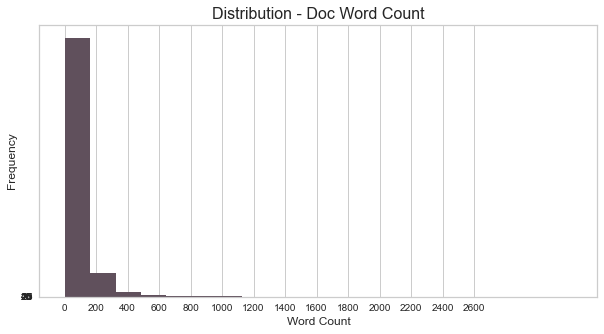

In [29]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df_txt_cleaned['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Doc Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 2700, 200))

plt.show()

In [30]:
df_txt_cleaned['word_count']

0          35
1          96
2          10
3          63
4          79
         ... 
99981     283
99982    1131
99983      66
99984      19
99985     104
Name: word_count, Length: 99986, dtype: int64

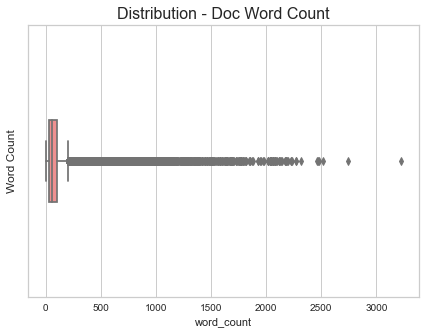

In [31]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(7,5))

sns.boxplot(
    df_txt_cleaned['word_count'],
    orient='v',
    width=.3,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Doc Word Count', fontsize=16)
# plt.yticks(np.arange(0, 2700, 100))

plt.show()

In [32]:
def df_Outliers_1_5_IQR(data, col):   
    
    # Calcul des quantiles
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
     # Formulation de l'écart IQR
    IQR = Q3 - Q1

    # Calcul des limites
    LowerLim = Q1 - 1.5*IQR
    UpperLim = Q3 + 1.5*IQR
    print('LowerLim : ', LowerLim, ' | UpperLim : ', UpperLim)
    
    # New dataframe with 1.5 IQR filtered data
    data = data[data[col] <= UpperLim]
    print('Shape after LowerLim filter : ', data.shape)
    data = data[data[col] >= LowerLim]
    print('Shape after UpperLim filter : ', data.shape)
        
    return data

In [33]:
col = 'word_count'
df_txt_cleaned_IQR = df_Outliers_1_5_IQR(df_txt_cleaned, col)

LowerLim :  -69.5  | UpperLim :  198.5
Shape after LowerLim filter :  (91880, 16)
Shape after UpperLim filter :  (91880, 16)


In [34]:
df_txt_cleaned_IQR[col].describe()

count    91880.000000
mean        61.379168
std         42.463553
min          1.000000
25%         29.000000
50%         49.000000
75%         83.000000
max        198.000000
Name: word_count, dtype: float64

In [35]:
# df_txt_cleaned_IQR.head()

In [36]:
# df_filtered = df_txt_cleaned[df_txt_cleaned['word_count'] < 75]
# df_filtered.head()

In [37]:
from collections import Counter
tab = Counter(" ".join(df_txt_cleaned_IQR["text"]).split()).most_common(100)
tab[1]

('get', 58114)

In [38]:
topn = 20
tabtt = pd.Series(' '.join(df_txt_cleaned_IQR.text).split()).value_counts()[:topn]
# .lower()

In [39]:
tabtt_2 = pd.DataFrame({'word':tabtt.index, 'frequency':tabtt.values})

In [40]:
tabtt_2.head()

,word,frequency
0,use,95440
1,get,58114
2,file,52782
3,code,40732
4,try,40680


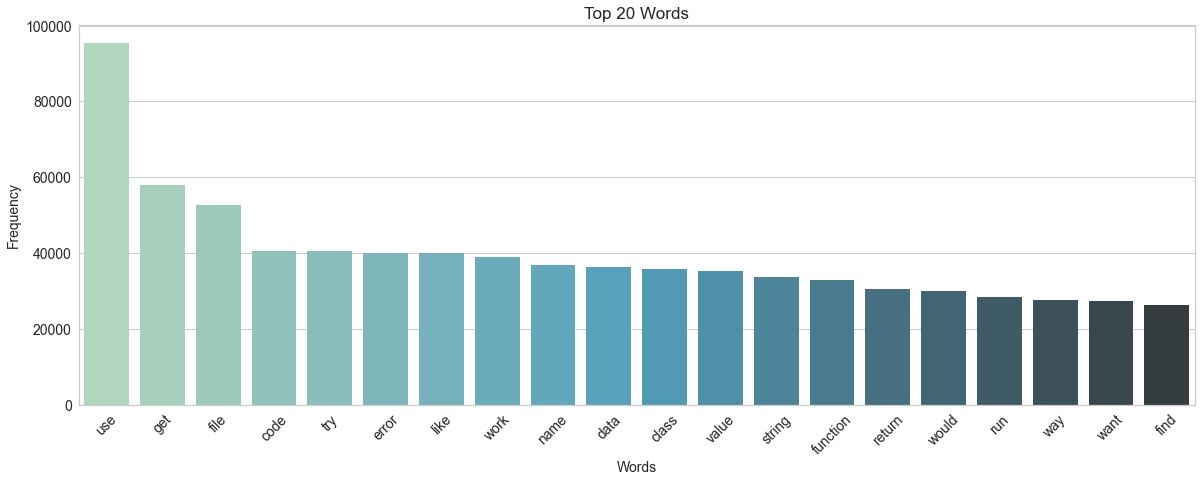

In [41]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=tabtt_2,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)

plt.show()



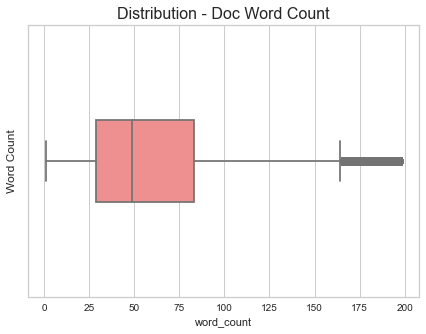

In [42]:
# Plot a boxplot of the word counts
fig = plt.figure(figsize=(7,5))

sns.boxplot(
    df_txt_cleaned_IQR['word_count'],
    orient='v',
    width=.3,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Doc Word Count', fontsize=16)
# plt.yticks(np.arange(0, 2700, 100))

plt.show()

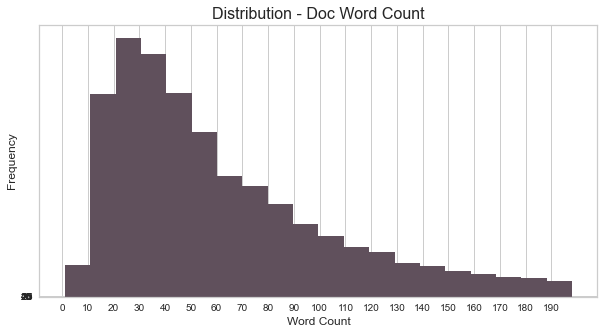

In [43]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df_txt_cleaned_IQR['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Doc Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 5))
plt.xticks(np.arange(0, 200, 10))

plt.show()

In [44]:
df_txt_cleaned_IQR.head()

,Unnamed: 0,Unnamed: 0.1,id,doc,title,tags,creation_date,score,views,answers,comments,favorites,last_activity_date,text,Cleaned_txt,word_count
0,0,0,9056957,python people initialize class attribute two w...,way class variable python,<python><class><attributes>,2012-01-29 21:26:39,296,372888,2,1,105,2021-01-25 13:17:29,way class variable python python people initia...,way class variable python python people initia...,35
1,1,1,52013133,use webpack create config file try use htmlweb...,entrypoint index html use htmlwebpackplugin,<node.js><reactjs><webpack><html-webpack-plugin>,2018-08-25 00:32:17,31,33607,5,2,7,2021-07-18 06:19:28,entrypoint index html use htmlwebpackplugin us...,entrypoint index html use htmlwebpackplugin us...,96
2,2,2,261963,notice math operator num way literate value num,literate num,<c++><enums>,2008-11-04 13:55:29,354,374899,24,5,67,2021-05-23 11:33:10,literate num notice math operator num way lite...,literate num notice math operator num way lite...,10
3,3,3,60684868,currently try use pretrained model provide dec...,decker image use compile work cpu,<docker><tensorflow>,2020-03-14 16:25:39,1,225,1,5,1,2021-01-04 03:48:09,decker image use compile work cpu currently tr...,decker image use compile cpu currently try us...,63
4,4,4,35136616,can not figure case loss application write ele...,handle loss three j,<javascript><three.js><webgl><electron>,2016-02-01 17:26:01,6,412,1,0,1,2021-03-18 17:02:54,handle loss three j can not figure case loss a...,handle loss three j figure case loss applica...,79


# Exploration de la variable contenant les tags

In [45]:
# On va sélectionner un certain nombre de tags et on 
# supprimera les observations
# qui ne collent pas

In [46]:
# tab_txt = [['lapin', 'chat', 'lion'],
#            [ 'chat', 'loup', 'poulet'],
#            [ 'poulet', 'poulet', 'poulet'],
#            [ 'poulet', 'ours'],
#           [ 'chat', 'loup', 'ours'],
#           [ 'chat', 'loup']]

In [47]:
# binarizer = MultiLabelBinarizer()

In [48]:
# txt_test_bin = binarizer.fit_transform(tab_txt)

In [49]:
# txt_test_bin

In [50]:
df = df_txt_cleaned_IQR.copy()

In [51]:
# Construction d'un dict
list_tags = df.tags.apply(lambda tags: tags[1:-1].split('><'))
# 1 et -1 nécéssaires dans tags à cause des caractères <> au début
# et à la fin de chaque bloc
list_tags.head()

0                         [python, class, attributes]
1    [node.js, reactjs, webpack, html-webpack-plugin]
2                                        [c++, enums]
3                                [docker, tensorflow]
4             [javascript, three.js, webgl, electron]
Name: tags, dtype: object

In [52]:
# df.tags[:]

In [53]:
len(list_tags)

91880

In [54]:
# Count instances
all_tags = {} # Dictionnaire
for index, row in list_tags.iteritems():
    # iteritems(): returns an iterator of 
    # the dictionary's list in the form of (key, value) tuple pairs
    for tag in row:
        # Construction du dict
        # incrémentation à chaque fois que le tag est rencontré
        all_tags[tag] = all_tags.get(tag, 0) + 1
        
print("Nombre de tags:", len(all_tags))

Nombre de tags: 18510


In [55]:
# Sort in descending order
tags_sorted = sorted(all_tags.items(), 
                     key=lambda x: x[1], reverse=True)

In [56]:
n = 10 # le top N

print("tags les plus présents:")
for tag, count in tags_sorted[:n]:
    print(f"{tag:15} {count:5}") # Affichage avec espacements en param

tags les plus présents:
python          11793
javascript       8940
java             6510
android          5562
c#               4976
php              3417
html             3313
c++              2775
ios              2613
css              2503


In [57]:
# Tag frequency limit (choice)
k_freq = 200

In [58]:
def filterTheDict(dictObj, callback):
    newDict = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if callback((key, value)):
            newDict[key] = value
    return newDict

In [59]:
# Filter a dictionary to keep elements only whose keys are even
# 1 to access count (int value)
newDict = filterTheDict(all_tags, lambda elem : elem[1] >= k_freq)
print('Filtered Dictionary \n')
print(newDict)
print('Done')

Filtered Dictionary 

{'python': 11793, 'class': 218, 'node.js': 2373, 'reactjs': 2396, 'webpack': 318, 'c++': 2775, 'docker': 1150, 'tensorflow': 457, 'javascript': 8940, 'iphone': 461, 'html': 3313, 'css': 2503, 'ios': 2613, 'objective-c': 586, 'swift': 1772, 'amazon-web-services': 1023, 'ruby-on-rails': 720, 'dart': 938, 'java': 6510, 'spring': 855, 'c': 1210, 'pandas': 1395, 'macos': 819, 'visual-studio-code': 864, 'python-3.x': 1488, 'android': 5562, 'oop': 211, 'linux': 1167, 'ruby': 579, 'datetime': 421, 'debugging': 314, 'algorithm': 712, 'android-layout': 225, 'git': 1985, 'command-line': 242, 'php': 3417, 'c#': 4976, 'wpf': 474, 'angular': 1693, 'regex': 815, 'laravel': 995, '.net': 1416, 'winforms': 280, 'string': 1018, 'arrays': 1277, 'windows': 1076, 'jquery': 1980, 'sql-server': 853, 'mysql': 1408, 'asp.net-core': 620, 'shell': 504, 'image': 443, 'sql': 1518, 'database': 526, 'xml': 377, 'object': 205, 'eclipse': 371, 'http': 327, 'rest': 370, 'asp.net': 660, 'visual-stud

In [60]:
len(newDict)

176

# Amélioration des tags

In [61]:
# -------------------------------------------------------------------------------

In [62]:
tags_to_rename = ['javascript','reactjs','node.js',
                  'python-3.x','mysql','amazon-web-services',
                  'visual-studio-code','react-native','sql-server',
                  'postgresql','ruby-on-rails','asp.net',
                  'vue.js','asp.net-core','android-studio',
                  'google-chrome','intellij-idea','python-2.7',
                  'asp.net-mvc','twitter-bootstrap','.net-core',
                  'amazon-s3','java-8','sqlite',
                  'c+.11','batch-file',
                  'google-cloud-platform','command-line','ecmascript-6',
                  'laravel-5','jupyter-notebook','gitlab',
                  'android-layout','jestjs','selenium-webdriver',
                  'tsql','ggplot2','next.js','.net-mvc','apache-spark',
                  'entity-framework','spring-boot', 'angularjs', 'docker-compose',
                  'heap-memory', 'aws-lambda', 'web-scraping', 'image-processing',
                  'spring-mvc', 'amazon-ec2', 'google-cloud-firestore', 'google-apps-script',
                  'django-models', 'material-ui', 'google-maps', 'apache-kafka', 'flutter-layout',
                  'vuejs2', 'sql-2008', 'chrome-extension', 'react-hooks', 'apache-sql',
                  'environment-variables', 'react-router', 'java-stream', 'django-rest-framework',
                  'google-sheets', 'user-interface', 'azure-devops', 'angular-material',
                  'deep-learning', 'for-loop', '.net-web-api', 'android-gradle-plugin', 'vb.net', 'rxjs',
                  'memory-management', 'sqlalchemy', 'ruby-3', 'python-requests', 'android-recyclerview',
                  'android-fragments', 'visual-studio-2010', 'error-handling', 'framework-core',
                  'data-structures', 'functional-programming', 'ionic-framework', 'android-emulator',
                  'vscode-settings', 'version-control', 'utf-8', 'xamarin.forms', 'https', 'if-statement',
                  'firebase-authentication', 'chrome-devtools', 'bootstrap-4', 'oauth-2.0', 'ipython',
                  'windows-10 ', 'android-intent', 'spring-security', 'visual-c+.', 'file-upload',
                  'spring-data-jpa', 'cocoa-touch', 'jenkins-pipeline', 'sequelize.js', 'neural-network',
                  'file-io', 'git-ci', 'github-actions', 'nestjs', 'google-bigquery', 'react-redux',
                  'android-activity', 'web-services', 'visual-studio-2017', 'nuxt.js', 'create-react-app',
                  'jquery-events', 'laravel-4', 'x86', 'django-admin', 'composer-php', 'google-api',
                  'cocoapods', 'azure-functions', 'spring-data', 'google-play', 'c+.20', 'css-selectors',
                  'google-cloud-functions', 'http-headers ', 'push-notification', 'angular-cli',
                  'stack-memory', 'firebase-cloud-messaging ', 'vuetify.js', 'chart.js', 'r-markdown',
                  'android-jetpack-compose', 'python-imaging-library', 'google-app-engine',
                  'visual-studio-2015', 'amazon-dynamodb', 'twitter-3', 'three.js', 'multidimensional-array',
                  'google-colaboratory', 'react-android', 'c+.17', 'selenium-chromedriver', 'firebase-realtime-database',
                  'visual-studio-2012', 'azure-active-directory', 'react-navigation', 'windows-subsystem-for-linux',
                  'django-templates', 'linux-kernel', '.net-3', 'visual-studio-2019', '.net-webapi', 'sql-2005', 'arraylist',
                  'gitlab-ci','twitter-bootstrap-3'
                  
                ]

In [63]:
tags_rename = ['js','react','js',
                  'python','sql','amazon',
                  'visual-studio','react','sql',
                  'sql','ruby','.net',
                  'js','.net','android',
                  'google','intellij','python',
                  '.net','bootstrap','.net',
                  'amazon','java','sql',
                  'c++','batch',
                  'google','command','ecmascript',
                  'laravel','jupyter','gitlab',
                  'android','js','selenium',
                  'sql','ggplot','js','.net','apache',
                  'framework','spring', 'angular', 'docker',
                  'memory', 'aws', 'scraping', 'image',
                  'spring', 'amazon', 'google', 'google',
                  'django', 'material', 'google', 'apache', 'flutter',
                  'js', 'sql', 'google', 'react', 'apache',
                  'environment', 'react', 'java', 'django',
                  'google', 'user', 'azure', 'angular',
                  'machine-learning', 'loop', '.net', 'android', '.net', 'js',
                  'memory', 'sql', 'ruby', 'python', 'android',
                  'android', 'visual-studio', 'error', 'framework',
                  'data', 'programming', 'framework', 'android',
                  'visual-studio', 'version', 'utf', 'xamarin', 'http', 'statement',
                  'firebase', 'google', 'bootstrap', 'oauth', 'python',
                  'windows', 'android', 'spring', 'c++', 'file',
                  'spring', 'cocoa', 'jenkins', 'js', 'machine-learning',
                  'file', 'git', 'github', 'js', 'google', 'react',
                  'android', 'web', 'visual-studio', 'js', 'react',
                  'jquery', 'laravel', 'windows', 'django', 'php', 'google',
                  'cocoa', 'azure', 'spring', 'google', 'c++', 'css',
                  'google', 'http ', 'notification', 'angular',
                  'memory', 'firebase', 'js', 'js', 'r',
                  'android', 'python', 'google',
                  'visual-studio', 'amazon', 'twitter', 'js', 'arrays',
                  'google', 'react', 'c++', 'selenium', 'firebase',
                  'visual-studio', 'azure', 'react', 'linux',
               'django', 'linux', '.net', 'visual-studio', '.net', 'sql',
               'arrays', 'gitlab','bootstrap'
              ]

In [64]:
len(tags_rename)

168

In [65]:
len(tags_to_rename)

168

In [66]:
# ddf = list_tags

In [67]:
# ddf.write(' '.join([replacements.get(w, w) for w in dictionary]))

In [68]:
tags_to_rename[104]
# tags_renamed[0]

'file-upload'

In [69]:
# # We shall delete chosen useless words
# # for i in range(0, len(tags_to_rename)):
# df['Cleaned_tags'] = df['tags'].str.replace('c+.17', 
#                                             'c++', 
#                                             regex='True')
# # Attention : ++ in formula leads to repetition error

In [70]:
# We shall deleted chosen useless words
df['Cleaned_tags'] = df['tags'].copy()

for i in range(0, len(tags_to_rename)):

    df['Cleaned_tags'] = df['Cleaned_tags'].str.replace(tags_to_rename[i], 
                                            tags_rename[i], 
                                            regex='True')
print(i)
# Attention : ++ in formula leads to repetition error

167


In [71]:
# Build the dictionary
list_tags = df.Cleaned_tags.apply(lambda tags: tags[1:-1].split('><'))
# 1 & -1 necessary because <> at the start
# and at the end of each part
list_tags.head()

0                  [python, class, attributes]
1    [js, react, webpack, html-webpack-plugin]
2                                 [c++, enums]
3                         [docker, tensorflow]
4                    [js, js, webgl, electron]
Name: Cleaned_tags, dtype: object

In [72]:
# df.tags[:]

In [73]:
len(list_tags)

91880

In [74]:
# Count instances
all_tags = {} # Dictionary
for index, row in list_tags.iteritems():
    # iteritems(): returns an iterator of 
    # the dictionary's list in the form of (key, value) tuple pairs
    for tag in row:
        # Build Dictionary
        # increment each time a tag is met
        all_tags[tag] = all_tags.get(tag, 0) + 1
        
print("Nombre de tags:", len(all_tags))

Nombre de tags: 18311


In [75]:
# Sort in descending order
tags_sorted = sorted(all_tags.items(), 
                     key=lambda x: x[1], reverse=True)

In [76]:
n_selec_tags = 50 # Top N words

print("tags les plus présents:")
for tag, count in tags_sorted[:n_selec_tags]:
    print(f"{tag:15} {count:5}") # Params correspond to spacing

tags les plus présents:
python          14028
js              13249
android          7226
java             6949
sql              5489
c#               4976
.net             3980
react            3959
php              3510
html             3313
c++              2775
ios              2613
css              2592
angular          2226
google           2139
jquery           2077
spring           2019
visual-studio    2013
git              1985
django           1928
r                1901
swift            1772
flutter          1752
amazon           1655
arrays           1470
ruby             1432
typescript       1414
docker           1410
pandas           1395
laravel          1320
linux            1318
c                1210
json             1178
windows          1172
apache           1077
string           1018
dart              938
bash              921
github            879
firebase          868
azure             849
macos             819
regex             815
xcode             784
selenium

In [77]:
# df.head()

# Nouveau dictionnaire post filtres

In [78]:
# Turn it into a list again
list_txt_cleaned_2 = df['Cleaned_txt'].copy()

In [79]:
list_txt_cleaned_2

0        way class variable python python people initia...
1        entrypoint index html use htmlwebpackplugin us...
2        literate num notice math operator num way lite...
3        decker image use compile  cpu currently try us...
4        handle loss three j   figure case loss applica...
                               ...                        
99979    remove son element jackson son node correspond...
99980    python panda replicate row dataframe dataframe...
99983    execute java cucumber step get step class atte...
99984    find character string letter try figure  strin...
99985    use spi speech recognition b script find  line...
Name: Cleaned_txt, Length: 91880, dtype: object

In [80]:
# Be sure to split sentence before feed into Dictionary
list_txt_cleaned_2 = [d.split() for d in list_txt_cleaned_2] # Should turn into a list

In [81]:
# Build dictionary
dictionary_2 = Dictionary(list_txt_cleaned_2)

In [82]:
# Number of vocabulary words
temp1 = len(dictionary_2)
print("Number of words inside vocab : ", len(dictionary_2))

Number of words inside vocab :  143346


In [83]:
# Number of vocabulary words after filtering
ntimes_w_down = 10
ntimes_w_up = 0.90

# Way to detect words that do not appear enough times
# Other solution directly inside countvectorizer function          

dictionary_2.filter_extremes(no_below = ntimes_w_down,
                          no_above = ntimes_w_up)
print("Number of words inside vocab after reduction: ", len(dictionary_2))
temp2 = len(dictionary_2)

Number of words inside vocab after reduction:  11443


In [84]:
prop_words_left = temp2/temp1 * 100
print("Proportion of words left : ", prop_words_left, ' % of initial volume')

Proportion of words left :  7.982782916858511  % of initial volume


## Selection des N tags

In [85]:
n_selec_tags = 50
# Select only desired tags
selected_tags = [tag for tag, count in tags_sorted[:n_selec_tags]]

copy_tags = list_tags.copy()

for index, row in list_tags.iteritems():
    copy_tags[index] = [tag for tag in row if tag in selected_tags]
    
mask = (copy_tags.apply(len) > 0)
df['List_tags'] = copy_tags #.apply(lambda l: ', '.join(l))
df['Document'] = df.Cleaned_txt #Title + ' ' + df.Body

corpus = df.loc[mask, ['Document', 'List_tags']]
corpus.sample(15)

,Document,List_tags
4592,studio variable memory address watch window ...,"[c#, visual-studio]"
16003,add download font tkinter download source font...,[python]
94146,convert list java anyone help tell char list v...,[java]
10473,android app via browser ok read answer say th...,[android]
71713,base chunk microphone get chunk microphone con...,"[python, python]"
69083,remove pad mat grid tile get lot space use til...,"[html, css, angular, angular]"
10061,value table sort query country theordercolumn...,[sql]
65896,python determine language get input text outpu...,"[python, string]"
69094,bash find answer stackoverflow explains pass a...,"[arrays, bash]"
63856,run code thread call others way run code thre...,[ios]


In [86]:
# Effect of tag selection on dataframe's size
print("Nombre d'observation avant filtrage: ", df.shape[0])
print("Nombre d'observaions après filtrage: ", corpus.shape[0])

Nombre d'observation avant filtrage:  91880
Nombre d'observaions après filtrage:  77786


In [87]:
corpus.head()

,Document,List_tags
0,way class variable python python people initia...,[python]
1,entrypoint index html use htmlwebpackplugin us...,"[js, react]"
2,literate num notice math operator num way lite...,[c++]
3,decker image use compile cpu currently try us...,[docker]
4,handle loss three j figure case loss applica...,"[js, js]"


## Filtre mots sur corpus

In [88]:
# Come back here to delete uninteresting w in top 100 words
w_to_remove = ['problem', 'thank', 'someth', 'chang',
               'howev', 'think', 'anoth', 'idea', 'anyon',
               'ad', 'el', 'instead', 'even']

In [89]:
# Let's get rid of some uninteresting words
corpus.Document = [word for word in corpus.Document if word not in w_to_remove]

# Dataset into train and test data

In [90]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(corpus.Document, 
                                                    corpus.List_tags, 
                                                    train_size=0.80, 
                                                    test_size=0.20, 
                                                    random_state=10)

In [91]:
Y_train

76230                  [mongodb, macos]
11045                   [python, azure]
51290                    [azure, azure]
12487                [android, android]
52096                       [json, sql]
                      ...              
22794    [python, json, django, django]
48422                             [php]
12907                          [docker]
11857                   [macos, docker]
65126                          [python]
Name: List_tags, Length: 62228, dtype: object

In [92]:
print( 'train length :', len(X_train),'\n', 'test length :',len(X_test))

train length : 62228 
 test length : 15558


## Dictionary on train data

In [93]:
list_X_train = X_train.copy()
list_X_test = X_test.copy()

In [94]:
# list_X_train

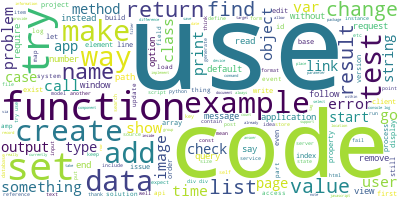

In [95]:
# Plot WordCloud
data = X_train
long_string = ','.join(list(data.values))# Create a WordCloud object

wordcloud = WordCloud(background_color="white",
                      max_words=1000, 
                      contour_width=3, 
                      contour_color='steelblue')# Generate a word cloud

wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

In [96]:
# # Come back here to delete uninteresting top 100 words
# w_to_remove = ['problem', 'thank', 'someth', 'chang',
#                'howev', 'think', 'anoth', 'idea', 'anyon',
#                'ad', 'el', 'instead', 'even']
# Faire le travail en amont avant le split train/test

In [97]:
# # Let's get rid of some uninteresting words
# X_train = [word for word in X_train if word not in w_to_remove]

In [98]:
# X_test = [word for word in X_test if word not in w_to_remove]

In [99]:
# Be sure to split sentence before feed into Dictionary
list_X_train = [d.split() for d in list_X_train] # Should turn into a list

In [100]:
# Be sure to split sentence before feed into Dictionary
list_X_test = [d.split() for d in list_X_test] # Should turn into a list

In [101]:
# Build dictionary
dictionary = Dictionary(list_X_train)

In [102]:
# Number of vocabulary words
temp1 = len(dictionary)
print("Number of words inside vocab : ", len(dictionary))

Number of words inside vocab :  109354


In [103]:
# Number of vocabulary words after filtering
ntimes_w_down = 10 # nb of occurences
ntimes_w_up = 0.90 # % here

# Way to detect words that do not appear enough times
# Other solution directly inside countvectorizer function          

dictionary.filter_extremes(no_below = ntimes_w_down,
                          no_above = ntimes_w_up)
print("Number of words inside vocab after reduction: ", 
      len(dictionary))

temp2 = len(dictionary)

Number of words inside vocab after reduction:  8971


In [104]:
prop_words_left = temp2/temp1 * 100
print("Proportion of words left : ", prop_words_left, ' % of initial volume')

Proportion of words left :  8.20363224024727  % of initial volume


In [105]:
# # Let's print most present words inside vocab
# # Detect useless ones to delete

# n_top = 100

# words_sorted = sorted(dictionary.dfs.items(), key=lambda x: x[1], reverse=True)
# id2token = {value: key for key, value in dictionary.token2id.items()}

# print("Mots les plus fréquents du dictionnaire:")

# for e, (i, count) in enumerate(words_sorted[:n_top]):
#     print(f"{e+1:2} {id2token[i]:15} {count:5}")

In [106]:
# Exploring data shape after dictionary's creation
df_X_train = pd.DataFrame(X_train)
df_X_train.shape

(62228, 1)

In [107]:
df_X_train.head()

,Document
76230,fail install mono db mac sur newbie db try mac...
11045,azure python dk exception try except statement...
51290,link content file azure devops generate link c...
12487,shortcut switch design text android studio any...
52096,search string son postgres data type column co...


In [108]:
df_X_test = pd.DataFrame(X_test)
df_X_test.shape

(15558, 1)

In [109]:
df_X_test.head()

,Document
76489,store python object container port exist pyt...
17674,python expect clear flushing line try characte...
6207,roulette prediction implement roulette predic...
70716,record attribute et core thank reviewer find d...
7394,change opacity card block bootstrap hey card b...


# Transform target data

In [110]:
binarizer = MultiLabelBinarizer()

In [111]:
Y_train_End = binarizer.fit_transform(Y_train)
Y_test_End = binarizer.transform(Y_test)

In [112]:
Y_train_End.shape, Y_test_End.shape

((62228, 50), (15558, 50))

In [113]:
Y_train_End

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Bag of Words

In [114]:
n_terms = len(dictionary_2)
n_terms

11443

In [115]:
X_train_bow = [dictionary_2.doc2bow(doc, allow_update=False) for doc in list_X_train]
# Attention au allow_update !!!!!

In [116]:
len(dictionary_2)

11443

In [117]:
X_train_bow[2]

[(36, 2),
 (202, 2),
 (249, 1),
 (283, 2),
 (575, 1),
 (1482, 1),
 (5309, 1),
 (5386, 2)]

In [118]:
list_X_test[1]

['python',
 'expect',
 'clear',
 'flushing',
 'line',
 'try',
 'character',
 'line',
 'recover',
 'state',
 'case',
 'contain',
 'prompt',
 'keywords',
 'use',
 'expect',
 'method',
 'call',
 'tried',
 'approach',
 'result',
 'keep',
 'run',
 'non',
 'expect',
 'behavior',
 'behavior',
 'use',
 'python',
 'perform',
 'follow',
 'code',
 'subsequently',
 'try',
 'buffer',
 'occasionally',
 'part',
 'accumulate',
 'character',
 'clear',
 'week',
 'havoc',
 'downstream',
 'logic',
 'thread',
 'put',
 'second',
 'time',
 'fetch',
 'incoming',
 'buffer',
 'execute',
 'nonblocking',
 'command',
 'time',
 'flushedstuff',
 'child',
 'read',
 'nonblocking',
 'timeout',
 'try',
 'use',
 'expect',
 'call',
 'line',
 'non',
 'block',
 'way',
 'find',
 'timeout',
 'exception',
 'incoming',
 'buffer',
 'clear',
 'find',
 'expect',
 'property',
 'parse',
 'method',
 'call',
 'flush',
 'line',
 'notice',
 'nonblocking',
 'buffer',
 'read',
 'directly',
 'line',
 'try',
 'child',
 'expect',
 'zzqqjjsh'

In [119]:
X_test_bow = [dictionary_2.doc2bow(doc, allow_update=False) for doc in list_X_test]

In [120]:
len(dictionary_2)

11443

In [121]:
# X_test_bow[1]

In [122]:
# Il faut ordonner les élements en colonnes
# Construire la matrice creuse
X_train_Sparse = corpus2csc(X_train_bow, num_terms=n_terms).transpose()

In [123]:
X_train_Sparse

<62228x11443 sparse matrix of type '<class 'numpy.float64'>'
	with 2048821 stored elements in Compressed Sparse Row format>

In [124]:
X_test_Sparse = corpus2csc(X_test_bow, num_terms=n_terms).transpose()

In [125]:
X_test_Sparse

<15558x11443 sparse matrix of type '<class 'numpy.float64'>'
	with 512569 stored elements in Compressed Sparse Row format>

 # Application des modèles supervisés TF-IDF

## SVM | TF-IDF

In [126]:
hyperparameters = {'svm__estimator__C': [1, 1.1, 1.11, 1.12]}

estimator_svm = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), 
                          ('svm', OneVsRestClassifier(LinearSVC(max_iter=10000)))
                         ])

grid_svm = GridSearchCV(estimator_svm,
                        hyperparameters,
                        scoring='accuracy',
                        cv=5,
                        verbose=1,
                        n_jobs=-1)


In [127]:
ti= time.time()
# ------------------------------------------------------ 
grid_svm.fit(X_train_Sparse, Y_train_End)
# ------------------------------------------------------  
# display training information along the way
print("done in %0.3fs." % (time.time() - ti))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
done in 185.765s.


In [128]:
print("SVM, Best accuracy score on test set: ", 
      round(grid_svm.score(X_test_Sparse, Y_test_End), 3))

SVM, Best accuracy score on test set:  0.484


In [129]:
# V1 : 0.397
# V2 : 0.479

In [130]:
print(grid_svm.best_params_)
print('SVM | The best accuracy achieved after parameter tuning via grid search is : ', round(grid_svm.best_score_, 3))

{'svm__estimator__C': 1.12}
SVM | The best accuracy achieved after parameter tuning via grid search is :  0.479


## Logistic Regression | TF-IDF

In [131]:

hyperparameters = {'clf__estimator__C': [13, 14, 15]}

estimator_clf = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), 
                         ('clf', OneVsRestClassifier(LogisticRegression(max_iter=10000)))
                        ])

grid_clf = GridSearchCV(estimator_clf, 
                       hyperparameters, 
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

In [132]:
estimator_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__estimator__C', 'clf__estimator__class_weight', 'clf__estimator__dual', 'clf__estimator__fit_intercept', 'clf__estimator__intercept_scaling', 'clf__estimator__l1_ratio', 'clf__estimator__max_iter', 'clf__estimator__multi_class', 'clf__estimator__n_jobs', 'clf__estimator__penalty', 'clf__estimator__random_state', 'clf__estimator__solver', 'clf__estimator__tol', 'clf__estimator__verbose', 'clf__estimator__warm_start', 'clf__estimator', 'clf__n_jobs'])

In [133]:
ti= time.time()
# ------------------------------------------------------ 
grid_clf.fit(X_train_Sparse, Y_train_End)
# ------------------------------------------------------  
# display training information along the way
print("done in %0.3fs." % (time.time() - ti))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
done in 738.747s.


In [134]:
estimator_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__estimator__C', 'clf__estimator__class_weight', 'clf__estimator__dual', 'clf__estimator__fit_intercept', 'clf__estimator__intercept_scaling', 'clf__estimator__l1_ratio', 'clf__estimator__max_iter', 'clf__estimator__multi_class', 'clf__estimator__n_jobs', 'clf__estimator__penalty', 'clf__estimator__random_state', 'clf__estimator__solver', 'clf__estimator__tol', 'clf__estimator__verbose', 'clf__estimator__warm_start', 'clf__estimator', 'clf__n_jobs'])

In [135]:
print("Logistic Regression, Best accuracy score on test set: ", 
      round(grid_clf.score(X_test_Sparse, Y_test_End), 3))
# 0.381
# V2 : 0.468

Logistic Regression, Best accuracy score on test set:  0.474


In [136]:
print(grid_clf.best_params_)
print('LogReg | The best accuracy achieved after parameter tuning via grid search is : ', round(grid_clf.best_score_, 3))

{'clf__estimator__C': 15}
LogReg | The best accuracy achieved after parameter tuning via grid search is :  0.467


## Naive Bayes | TF-IDF

In [137]:
hyperparameters = {'nb__estimator__alpha': [0.03, 0.025, 0.02, 0.0175, 0.01]}

estimator_nb = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), 
                         ('nb', OneVsRestClassifier(MultinomialNB()))
                        ])

grid_nb = GridSearchCV(estimator_nb, 
                       hyperparameters, 
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)


In [138]:
ti= time.time()
# ------------------------------------------------------ 
grid_nb.fit(X_train_Sparse, Y_train_End)
# ------------------------------------------------------  
# display training information along the way
print("done in %0.3fs." % (time.time() - ti))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
done in 19.299s.


In [139]:
print("Naive Bayes, Best accuracy score on test set: ", 
      round(grid_nb.score(X_test_Sparse, Y_test_End), 3))

Naive Bayes, Best accuracy score on test set:  0.309


In [140]:
print(grid_nb.best_params_)
print('NB | The best accuracy achieved after parameter tuning via grid search is : ', round(grid_nb.best_score_, 3))

{'nb__estimator__alpha': 0.025}
NB | The best accuracy achieved after parameter tuning via grid search is :  0.307


In [141]:
# V1 : 0.232
# V2 : 0.302

## Random Forest | TF-IDF

In [142]:

hyperparameters = {'rf__n_estimators': [25, 26, 29, 30, 31],
                   'rf__criterion': ['gini', 'entropy'],
                  }

estimator_rf = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), 
                         ('rf', RandomForestClassifier())
                        ])

grid_rf = GridSearchCV(estimator_rf, 
                       hyperparameters,
                       scoring='accuracy',
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

In [143]:
estimator_rf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'rf', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_impurity_split', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [144]:
ti= time.time()
# ------------------------------------------------------ 
grid_rf.fit(X_train_Sparse, Y_train_End)
# ------------------------------------------------------  
# display training information along the way
print("done in %0.3fs." % (time.time() - ti))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
done in 3315.495s.


In [145]:
print("Random Forest, Best accuracy score on test set: ", 
      round(grid_rf.score(X_test_Sparse, Y_test_End), 3))

Random Forest, Best accuracy score on test set:  0.358


In [146]:
print(grid_rf.best_params_)
print('RF | The best accuracy achieved after parameter tuning via grid search is : ', round(grid_rf.best_score_, 3))
# V1 : 0.262
# V2 : 0.358

{'rf__criterion': 'gini', 'rf__n_estimators': 29}
RF | The best accuracy achieved after parameter tuning via grid search is :  0.348


## XGBOOST | TF-IDF

In [147]:
# hyperparameters = {'xgb__estimator__learning_rate': [0.01, 0.1, 0.3],
#                    'eval_metric' : ["logloss"],
#                   }

# estimator_xgb = Pipeline([('tfidf', TfidfTransformer(use_idf=True)), 
#                          ('xgb',  OneVsRestClassifier(XGBClassifier()))
#                         ])

# grid_xgb = GridSearchCV(estimator_xgb, 
#                        hyperparameters,
#                        scoring='accuracy',
#                        cv=5,
#                        verbose=1,
#                        n_jobs=-1)

In [148]:
# estimator_xgb.get_params().keys()

In [149]:
# ti= time.time()
# # ------------------------------------------------------ 
# grid_xgb.fit(X_train_Sparse, Y_train_End)
# # ------------------------------------------------------  
# # display training information along the way
# print("done in %0.3fs." % (time.time() - ti))

In [150]:
# print("Xgboost, Best accuracy score on test set: ", 
#       round(grid_xgb.score(X_test_Sparse, Y_test_End), 3))


In [151]:
# print(grid_xgb.best_params_)
# print('XGB | The best accuracy achieved after parameter tuning via grid search is : ', round(grid_xgb.best_score_, 3))

In [152]:
# Test 1 : Temps : 10608 s et precision = 0.397

# Partie prédiction

In [153]:
optimal_model = grid_svm.best_estimator_

In [154]:
def predict_tags_supervised(optimal_model = optimal_model, X_test = X_test, X_test_bow = X_test_bow, n_cases = 10):

    for n_ex in range(n_cases):
        # Transform into sparse matrix in order to feed it to the optimal model
        my_test = corpus2csc(X_test_bow[n_ex:n_ex+1], num_terms=n_terms).transpose()
        # Get actual Sparse Matrix X_test
        series = corpus.loc[X_test.reset_index().iloc[n_ex, 0]]
        
        # Get tags from inverse transform of prediction
        tags_supervised = binarizer.inverse_transform(optimal_model.predict(my_test))[0]

        print(f'Test n°{n_ex+1}')
        print('—'*10)
        display(HTML(series.Document))
        print('—'*50)
        print('\tTags cibles:', ', '.join(series.List_tags))
        print('\tTags proposés:', ', '.join(tags_supervised))
        print('—'*50, '\n'*4)

In [155]:
n_terms

11443

In [156]:
# X_test_bow[10:11]

In [157]:
predict_tags_supervised(n_cases=1)

Test n°1
——————————


——————————————————————————————————————————————————
	Tags cibles: python, c++
	Tags proposés: python
—————————————————————————————————————————————————— 






In [158]:
def prepared_text(df_doc_test):
    df_doc_test['text'] = df_doc_test['title'] + ' ' + df_doc_test['doc']
    df_doc_test['text'] = df_doc_test['text'].apply(lambda x: clean_text(x))
    df_doc_test['text'] = df_doc_test['text'].apply(lambda x: expand_contractions(x)) 
    #df_doc_test['text'] = df_doc_test['text'].apply(lambda x: autocorrect(x)) 
    df_doc_test['text'] = df_doc_test['text'].str.lower()
    #df_doc_test['text'] = df_doc_test['text'].apply(lambda x: remove_non_alphabetical_character(x)) 
    #df_doc_test['text'] = df_doc_test['text'].apply(lambda x: remove_single_letter(x)) 
    df_doc_test['text'] = df_doc_test['text'].apply(lambda x: remove_stopwords(x))
    df_doc_test['text'] = df_doc_test['text'].apply(lambda x: remove_by_tag(x, adjective_tag_list))
    df_doc_test['text'] = df_doc_test['text'].apply(lambda x: lemmatize_text(x))
    doc_test_prepared = list(df_doc_test['text'])
    
    return doc_test_prepared # Format !!

In [159]:
df_doc_test = pd.DataFrame()

In [160]:
df_doc_test['title'] = ['Machine-Learning on  codes, dataframes']

In [161]:
df_doc_test['doc'] = ['CodEE is dataframe java js js java. MAchine-learning. I want to know how in order to do some machine-learning. It seems a lot better than c, c++ or r']

In [162]:
df_doc_test['doc'].head()

0     is dataframe java js js java. MAchine-learnin...
Name: doc, dtype: object

In [163]:
doc_test_prepared = prepared_text(df_doc_test)
doc_test_prepared

NameError: name 'token' is not defined

In [ ]:
list_doc = [d.split() for d in doc_test_prepared] # Should turn into a list
list_doc

In [ ]:
test_new = [dictionary_2.doc2bow(doc, allow_update=False) for doc in list_doc]

In [ ]:
test_prepared_2 = list_X_test[50:51]

In [ ]:
test_new_2 = [dictionary_2.doc2bow(doc, allow_update=False) for doc in test_prepared_2]

In [ ]:
def transform_doc_test(doc_test_prepared):
    
    # Transform into sparse matrix in order to feed it to the optimal model
    doc_test_transformed = corpus2csc(doc_test_prepared, num_terms=n_terms).transpose()
    return doc_test_transformed

In [ ]:
doc_test_transformed = transform_doc_test(test_new)
doc_test_transformed

In [ ]:
def predict_tags_supervised_unseen_doc(doc_test_transformed, initial_doc_entry, optimal_model=optimal_model):

        # Get tags from inverse transform of prediction
        tags_supervised = binarizer.inverse_transform(optimal_model.predict(doc_test_transformed))[0]

        print(f'Test')
        print('—'*10)
        print([[' '.join(i)] for i in initial_doc_entry])
        print('—'*50)
        print('\tTags proposés:', ', '.join(tags_supervised))
        print('—'*50, '\n'*4)

In [ ]:
initial_doc_entry = list_doc

In [ ]:
[[' '.join(i)] for i in initial_doc_entry]

In [ ]:
predict_tags_supervised_unseen_doc(doc_test_transformed, initial_doc_entry, optimal_model=optimal_model)

# Pickle saving

In [ ]:
import pickle

In [ ]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)